<a href="https://colab.research.google.com/github/svenu96/Comptom-camera-source-reconstruction/blob/main/reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Define folders containing the CSV files
data = pd.read_csv('/content/drive/MyDrive/scattering_data.csv')

In [10]:
data

,source_x,source_y,source_z,absorb_x,absorb_y,absorb_z,scat_x,scat_y,scat_z,theta,e_energy
0,10.000000,0.000000,0.0,10.783172,16.927753,-309.477961,10.783172,7.265047,-200.0,0.260464,999984.850256
1,10.000000,0.000000,0.0,16.201762,9.924688,-306.715823,16.201762,0.704182,-200.0,0.397451,999993.444513
2,10.000000,0.000000,0.0,1.323623,35.296020,-290.082662,1.323623,25.299756,-200.0,0.027335,998633.973388
3,10.000000,0.000000,0.0,18.750325,34.023234,-290.981217,18.750325,29.075022,-200.0,1.053167,999998.988478
4,10.000000,0.000000,0.0,20.952657,26.257850,-300.918188,20.952657,16.679007,-200.0,0.291255,999987.866899
...,...,...,...,...,...,...,...,...,...,...,...
9995,9.980267,-0.627905,0.0,35.965065,39.116517,-308.407582,35.965065,37.541156,-200.0,1.412601,999999.393446
9996,9.980267,-0.627905,0.0,2.427225,8.576041,-302.324263,2.427225,17.326728,-200.0,2.636374,999999.727477
9997,9.980267,-0.627905,0.0,28.412067,10.496508,-290.938163,28.412067,0.499138,-200.0,0.022936,998060.924771
9998,9.980267,-0.627905,0.0,38.835863,24.808726,-291.247286,38.835863,15.335833,-200.0,0.326130,999990.305663


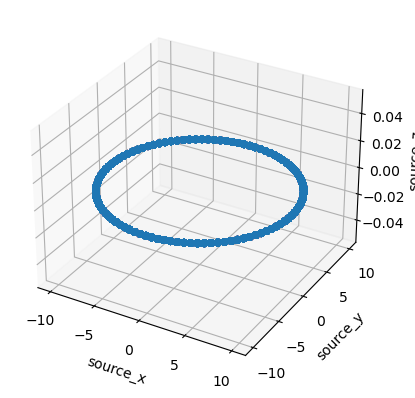

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['source_x'], data['source_y'], data['source_z'])

ax.set_xlabel('source_x')
ax.set_ylabel('source_y')
ax.set_zlabel('source_z')

plt.show()

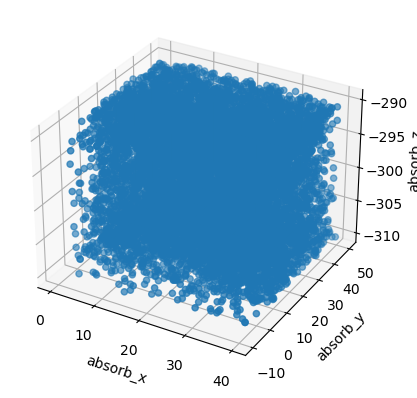

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['absorb_x'], data['absorb_y'], data['absorb_z'])

ax.set_xlabel('absorb_x')
ax.set_ylabel('absorb_y')
ax.set_zlabel('absorb_z')

plt.show()

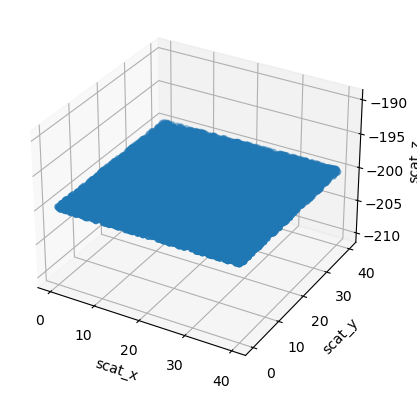

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['scat_x'], data['scat_y'], data['scat_z'])

ax.set_xlabel('scat_x')
ax.set_ylabel('scat_y')
ax.set_zlabel('scat_z')

plt.show()

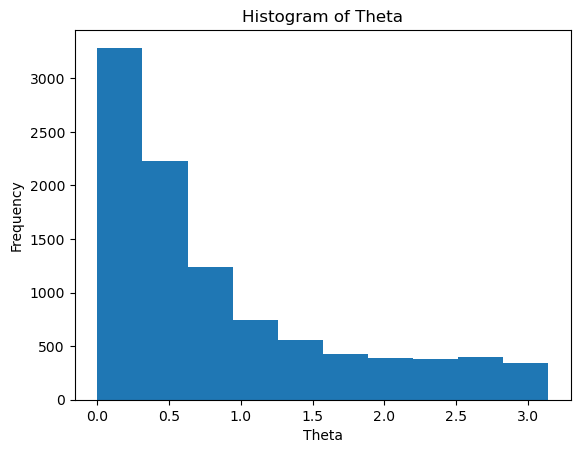

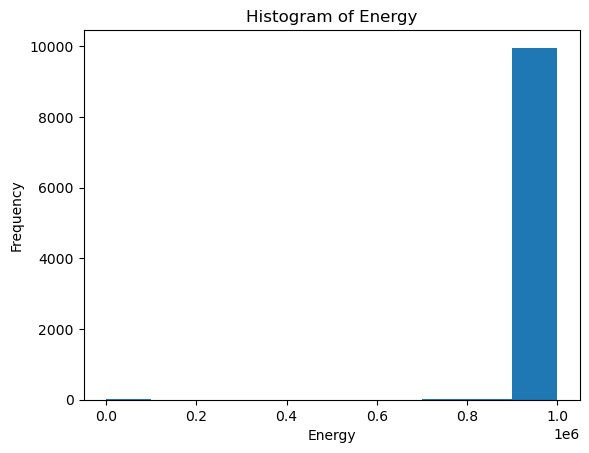

In [ ]:

plt.hist(data['theta'], bins=10)
plt.xlabel('Theta')
plt.ylabel('Frequency')
plt.title('Histogram of Theta')
plt.show()

plt.hist(data['e_energy'], bins=10)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Energy')
plt.show()

In [22]:
labels = data[['source_x', 'source_y', 'source_z']]
features = data.drop(columns=['source_x', 'source_y', 'source_z'])


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (8000, 8)
y_train: (8000, 3)

Testing set shapes:
X_test: (2000, 8)
y_test: (2000, 3)


In [25]:

# Define and compile the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)
])
model.compile(optimizer='adam', loss='mse')


Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 63327.5312 - val_loss: 251581.8750
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 42339.8047 - val_loss: 98363.9375
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 105067.0703 - val_loss: 737.8191
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 116605.4609 - val_loss: 11864.8223
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 140224.4844 - val_loss: 296315.7188
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 206160.5156 - val_loss: 1679578.8750
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 54849.7344 - val_loss: 132418.6875
Epoch 8/10
200/200 [==============================] - 1s 4ms/step - loss: 240302.1406 - val_loss: 113600.5703
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 182774.6406 - val_loss: 9691.0195
Epoch 10/10
63/63 [

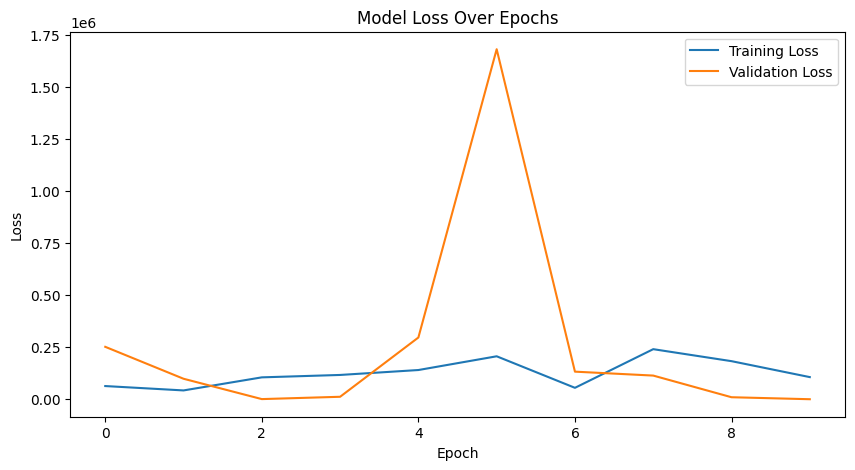

In [28]:

# Train the model with a validation split to monitor overfitting
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test dataset
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Make predictions on the test dataset
predictions = model.predict(X_test)
print("Predictions:")
print(predictions)

# Optionally, calculate the Mean Squared Error on the test set predictions
mse = np.mean((predictions - y_test.values)**2)
print("Mean Squared Error on Test Set:", mse)

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


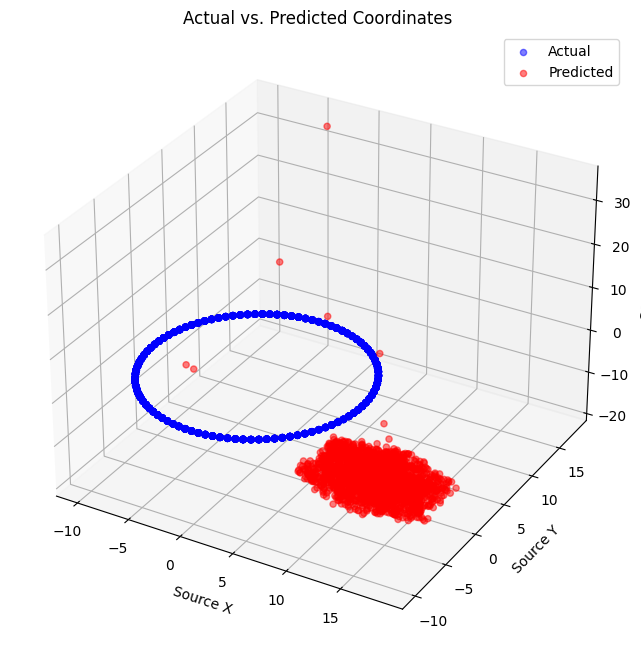

In [29]:
from mpl_toolkits.mplot3d import Axes3D


# Creating a figure for 3D plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual data
ax.scatter(y_test['source_x'], y_test['source_y'], y_test['source_z'], c='blue', label='Actual', alpha=0.5)

# Plotting predicted data
ax.scatter(predictions[:, 0], predictions[:, 1], predictions[:, 2], c='red', label='Predicted', alpha=0.5)

# Labeling axes
ax.set_xlabel('Source X')
ax.set_ylabel('Source Y')
ax.set_zlabel('Source Z')

# Adding legend
ax.legend()

# Title
ax.set_title('Actual vs. Predicted Coordinates')

# Show plot
plt.show()
